This is the begining of edge detection for the buildings roof
1- Mask out the buildings from the image using the GeoJson
2- Save as an RGB image.
3- Prform the Canny edge detection algorithm.

In [11]:
import rasterio as rio
import fiona
import rasterio.mask
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

In [2]:
def mask_buildings(raster_path, geoson_path, mask_path):
    '''
    Takes the paths for a raster image  and a geoJson mask
    '''
    # Get the geoJson mask and the raster image
    with fiona.open(geoson_path, 'r') as gdf:
         polys = [feature["geometry"] for feature in gdf]
    
    with rio.open(raster_path) as src:
        out_image, out_transform = rasterio.mask.mask(src, polys, crop=True)
        out_meta = src.meta
    
    # Save the new masked image    
    out_meta.update({ "driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})

    with rasterio.open(mask_path, "w", **out_meta) as dest:
        dest.write(out_image)


def save_rgb_mask(raster_img):
    with rio.open(raster_img) as img:
        red = img.read(2)
        green = img.read(4)
        blue = img.read(3)
    rgb = np.dstack((red, green, blue))
    rgb = (255.0 / rgb.max() * (rgb - rgb.min())).astype(np.uint8)
    img = Image.fromarray(rgb)
    img.save(raster_img[:-4] + '.png')

    

In [9]:
raster_path = 'D:/SpaceNet_Sample/Atlanta_nadir7_catid_1030010003D22F00/Pan-Sharpen/Pan-Sharpen_Atlanta_nadir7_catid_1030010003D22F00_733601_3724689.tif'
geoJson_path = 'D:/SpaceNet_Sample/geojson/spacenet-buildings/spacenet-buildings_733601_3724689.geojson'

raster_path = 'D:/SpaceNet_Sample/Atlanta_nadir7_catid_1030010003D22F00/Pan-Sharpen/Pan-Sharpen_Atlanta_nadir7_catid_1030010003D22F00_742601_3727389.tif'
geoJson_path = 'D:/SpaceNet_Sample/geojson/spacenet-buildings/spacenet-buildings_742601_3727389.geojson'
mask_buildings(raster_path, geoJson_path, 'D:/' + raster_path[-68:-4] + '_masked(2).tif')

save_rgb_mask('D:/' + raster_path[-68:-4] + '_masked(2).tif')

In [13]:
img = Image.open('D:/' + raster_path[-68:-4] + '_masked(2).png')
#img = Image.open('D:/' + raster_path[-68:-4] + '_edges.png')

## Enhance the light
enhancer = ImageEnhance.Brightness(img)
factor = 2 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('D:/' + raster_path[-68:-4] + '_masked(2).png')
#################################################
# Any edges with intensity gradient more than maxVal are sure to be edges
# Below minVal are sure to be non-edges


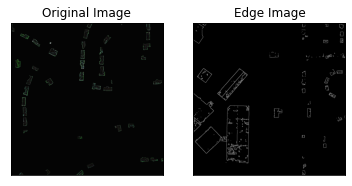

In [30]:

img = cv2.imread('D:/' + raster_path[-68:-4] + '_masked(2).png')
min_val = 200
max_val = 250
edges = cv2.Canny(img, min_val, max_val)

plt.subplot(121), plt.imshow(img_clahe, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
# Save the edge image
img = Image.fromarray(edges)
img.save('D:/' + raster_path[-68:-4] + '_edges(2).png')

In [14]:
'''# Creating maxican hat filter
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
# Applying cv2.filter2D function on our Cybertruck image
mexican_hat_img1=cv2.filter2D(img_clahe,-1,filter)
plt.imshow(mexican_hat_img1)
# Save the edge image
img = Image.fromarray(mexican_hat_img1)
img.save('D:/' + raster_path[-68:-4] + '_edges.png')'''

"# Creating maxican hat filter\nfilter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])\n# Applying cv2.filter2D function on our Cybertruck image\nmexican_hat_img1=cv2.filter2D(img_clahe,-1,filter)\nplt.imshow(mexican_hat_img1)\n# Save the edge image\nimg = Image.fromarray(mexican_hat_img1)\nimg.save('D:/' + raster_path[-68:-4] + '_edges.png')"

In [17]:
''''# Creating our emboss filter
filter = np.array([[0,1,0],[0,0,0],[0,-1,0]])
# Applying cv2.filter2D function on our Logo image
emboss_img_1=cv2.filter2D(img_clahe,-1,filter)
emboss_img_1=emboss_img_1+128
plt.imshow(emboss_img_1)
# Save the edge image
img = Image.fromarray(emboss_img_1)
img.save('D:/' + raster_path[-68:-4] + '_edges.png')'''

"'# Creating our emboss filter\nfilter = np.array([[0,1,0],[0,0,0],[0,-1,0]])\n# Applying cv2.filter2D function on our Logo image\nemboss_img_1=cv2.filter2D(img_clahe,-1,filter)\nemboss_img_1=emboss_img_1+128\nplt.imshow(emboss_img_1)\n# Save the edge image\nimg = Image.fromarray(emboss_img_1)\nimg.save('D:/' + raster_path[-68:-4] + '_edges.png')"

# Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html